<a href="https://colab.research.google.com/github/iamdeepti25/100-Days-of-ML/blob/main/Regression_metrices_practice_Day_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset - https://www.kaggle.com/datasets/smid80/weatherww2/data?select=Weather+Station+Locations.csv

Problem Statement - Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

In [85]:
import numpy as np
import pandas as pd

In [86]:
# df = pd.read_csv('/content/Weather Station Locations.csv')
# df.head()

In [87]:
# df.info()

In [88]:
df = pd.read_csv('/content/Summary of Weather.csv',usecols=['MinTemp','MaxTemp'])
df = df[['MinTemp','MaxTemp']]
df

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
...,...,...
119035,18.333333,28.333333
119036,18.333333,29.444444
119037,18.333333,28.333333
119038,18.333333,28.333333


In [89]:
df.isnull().sum()

MinTemp    0
MaxTemp    0
dtype: int64

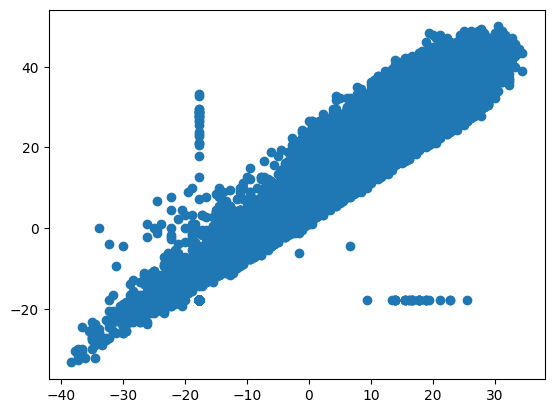

In [120]:
import matplotlib.pyplot as plt

plt.scatter(x=df.iloc[:,0],y = df.iloc[:,1])

In [90]:
X = df.iloc[:,0]
y = df.iloc[:,1]

X,y

(0         22.222222
 1         21.666667
 2         22.222222
 3         22.222222
 4         21.666667
             ...    
 119035    18.333333
 119036    18.333333
 119037    18.333333
 119038    18.333333
 119039    17.222222
 Name: MinTemp, Length: 119040, dtype: float64,
 0         25.555556
 1         28.888889
 2         26.111111
 3         26.666667
 4         26.666667
             ...    
 119035    28.333333
 119036    29.444444
 119037    28.333333
 119038    28.333333
 119039    29.444444
 Name: MaxTemp, Length: 119040, dtype: float64)

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [92]:
X_train.shape,X_test.shape

((95232,), (23808,))

In [93]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [94]:
X_train.shape,X_test.shape

((95232, 1), (23808, 1))

In [95]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

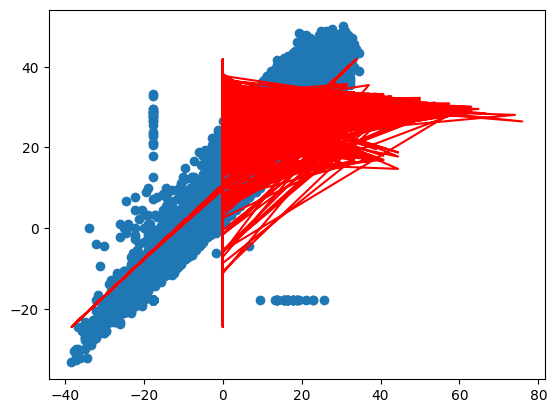

In [133]:
plt.scatter(x=df.iloc[:,0],y = df.iloc[:,1])
plt.plot(X_train,lr.predict(X_train),color='red')

In [96]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [97]:
print('MAE',mean_absolute_error(y_pred,y_test))

MAE 3.1870525069368134


In [98]:
print('MSE',mean_squared_error(y_pred,y_test))

MSE 17.594321371181294


In [99]:
print('RMSE',np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE 4.194558543062821


In [100]:
print('R2',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)

R2 0.6982475284427241


In [101]:
#Adjusted R2 score
k = X_test.shape[0]
n = 1
print(k,n)

(1-((1-r2)*(k-1)/(k-n-1)))

23808 1


0.6982348529629476

In [102]:
new_df = pd.read_csv('/content/Summary of Weather.csv')
new_df.sample(5)

<ipython-input-102-e964fed5907c>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('/content/Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
88839,33406,1945-4-23,0,NaN,17.222222,2.777778,10.000000,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79972,33014,1944-3-31,0,NaN,19.444444,7.777778,13.888889,0.0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24879,11610,1943-8-15,T,NaN,31.666667,22.777778,27.222222,0.0,1,43,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
100997,50401,1943-3-13,T,NaN,30.000000,23.333333,26.666667,0.0,1.0,43,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
25028,11610,1944-1-11,0.254,NaN,29.444444,21.666667,25.555556,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [103]:
new_df['WindGustSpd'].value_counts()

WindGustSpd
37.040    71
29.632    55
27.780    50
33.336    42
40.744    37
31.484    34
44.448    24
35.188    23
42.596    20
38.892    19
50.004    17
24.076    16
46.300    15
22.224    13
48.152    13
53.708    12
51.856    12
25.928    12
57.412     9
55.560     7
59.264     7
61.116     5
62.968     5
20.372     5
75.932     2
18.520     2
74.080     2
68.524     1
66.672     1
64.820     1
Name: count, dtype: int64

In [104]:
new_df['Precip'].value_counts()

Precip
0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

In meteorology, a trace(T) denotes an amount of precipitation, such as rain or snow, that is greater than zero, but is too small to be measured by standard units or methods of measurement. The designation of a trace rather than zero is used to indicate that precipitation did fall, but not enough to be measured reliably. This is important for both weather forecasting and climatological purposes, because even precipitation amounts too small to be measured can have significant societal impacts.

In [109]:
new_df = pd.read_csv('/content/Summary of Weather.csv',usecols=['MinTemp','WindGustSpd','MaxTemp'])
new_df = new_df[['MinTemp','WindGustSpd','MaxTemp']]
new_df.head()

,MinTemp,WindGustSpd,MaxTemp
0,22.222222,NaN,25.555556
1,21.666667,NaN,28.888889
2,22.222222,NaN,26.111111
3,22.222222,NaN,26.666667
4,21.666667,NaN,26.666667


In [112]:
new_df.isnull().mean()

MinTemp        0.0
WindGustSpd    0.0
MaxTemp        0.0
dtype: float64

In [111]:
new_df['WindGustSpd'].fillna(0,inplace=True)

In [ ]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,2]

X,y

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [116]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [117]:
print('R2',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)

R2 0.6986510143378143


In [118]:
#Adjusted R2 score
k = X_test.shape[0]
n = 2
print(k,n)

(1-((1-r2)*(k-1)/(k-n-1)))

23808 2


0.6986256962125749